In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'D:/! МИСИС/! МАШИННОЕ ОБУЧЕНИЕ (ВЕСНА 2024)/Практика/01 (2024-02-14)/yelp_academic_dataset_business.json'

In [3]:
# Загрузка данных о компаниях (отзывы и т.д.)
biz_file = open(file_path)

In [4]:
biz_array = [json.loads(x) for x in biz_file.readlines()]

In [5]:
biz_array

[{'business_id': 'O_X3PGhk3Y5JWVi866qlJg',
  'full_address': '1501 W Bell Rd\nPhoenix, AZ 85023',
  'hours': {'Monday': {'close': '18:00', 'open': '11:00'},
   'Tuesday': {'close': '18:00', 'open': '11:00'},
   'Friday': {'close': '18:00', 'open': '11:00'},
   'Wednesday': {'close': '18:00', 'open': '11:00'},
   'Thursday': {'close': '18:00', 'open': '11:00'},
   'Sunday': {'close': '18:00', 'open': '11:00'},
   'Saturday': {'close': '18:00', 'open': '11:00'}},
  'open': True,
  'categories': ['Active Life',
   'Arts & Entertainment',
   'Stadiums & Arenas',
   'Horse Racing'],
  'city': 'Phoenix',
  'review_count': 29,
  'name': 'Turf Paradise Race Course',
  'neighborhoods': [],
  'longitude': -112.0923293,
  'state': 'AZ',
  'stars': 4.0,
  'latitude': 33.6385727,
  'attributes': {'Take-out': False,
   'Wi-Fi': 'free',
   'Good For': {'dessert': False,
    'latenight': False,
    'lunch': False,
    'dinner': False,
    'brunch': False,
    'breakfast': False},
   'Noise Level': 'av

In [6]:
biz_df = pd.DataFrame(biz_array)

In [7]:
biz_file.close()

In [8]:
biz_df.head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
0,O_X3PGhk3Y5JWVi866qlJg,"1501 W Bell Rd\nPhoenix, AZ 85023","{'Monday': {'close': '18:00', 'open': '11:00'}...",True,"[Active Life, Arts & Entertainment, Stadiums &...",Phoenix,29,Turf Paradise Race Course,[],-112.092329,AZ,4.0,33.638573,"{'Take-out': False, 'Wi-Fi': 'free', 'Good For...",business
1,QbrM7wqtmoNncqjc6GtFaQ,"18501 N 83rd Avenue\nGlendale, AZ 85308",{},True,"[Tires, Automotive, Fashion, Shopping, Departm...",Glendale,3,Sam's Club Members Only,[],-112.234755,AZ,3.5,33.648545,"{'Parking': {'garage': False, 'street': False,...",business
2,7lbvsGKzhjuX3oJtaXJvOg,"5000 S Arizona Mills Cir\nSte 590\nTempe, AZ 8...","{'Monday': {'close': '21:00', 'open': '10:00'}...",True,"[Women's Clothing, Men's Clothing, Fashion, Sh...",Tempe,7,Forever 21,[],-111.964485,AZ,3.5,33.383123,"{'Parking': {'garage': False, 'street': False,...",business
3,gjxoKVsRJwEoa8zd9XxlAw,"912 W Sycamore Pl\nChandler, AZ 85225","{'Monday': {'close': '19:00', 'open': '06:00'}...",True,"[Pet Services, Pet Boarding/Pet Sitting, Pets]",Chandler,4,Loving Hands Pet Care,[],-111.857818,AZ,5.0,33.356472,{},business
4,V28yjMqyZnbCtabroJN_aA,"1745 W Glendale Ave\nPhoenix, AZ 85021",{},True,"[Veterinarians, Pets]",Phoenix,3,Amec Mid-City Animal Hospital,[],-112.097232,AZ,5.0,33.538493,{},business


In [9]:
biz_df.shape

(15585, 15)

In [10]:
biz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15585 entries, 0 to 15584
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   business_id    15585 non-null  object 
 1   full_address   15585 non-null  object 
 2   hours          15585 non-null  object 
 3   open           15585 non-null  bool   
 4   categories     15585 non-null  object 
 5   city           15585 non-null  object 
 6   review_count   15585 non-null  int64  
 7   name           15585 non-null  object 
 8   neighborhoods  15585 non-null  object 
 9   longitude      15585 non-null  float64
 10  state          15585 non-null  object 
 11  stars          15585 non-null  float64
 12  latitude       15585 non-null  float64
 13  attributes     15585 non-null  object 
 14  type           15585 non-null  object 
dtypes: bool(1), float64(3), int64(1), object(10)
memory usage: 1.7+ MB


In [11]:
biz_df.describe()

,review_count,longitude,stars,latitude
count,15585.000000,15585.000000,15585.000000,15585.000000
mean,22.773051,-111.990672,3.675136,33.487013
std,51.694703,0.171537,0.904469,0.137265
min,3.000000,-112.937635,1.000000,32.876638
25%,4.000000,-112.077200,3.000000,33.393352
50%,6.000000,-111.969253,3.500000,33.486257
75%,17.000000,-111.896315,4.500000,33.586545
max,1170.000000,-111.263557,5.000000,34.048668


Text(0, 0.5, 'Occurence')

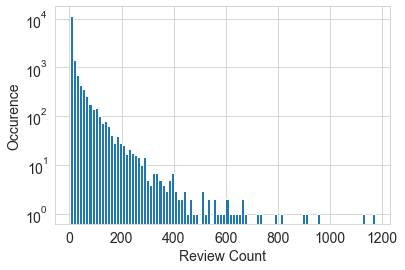

In [12]:
# Составить гистограмму счетчиков отзывов
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
ax.set_yscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurence', fontsize=14)

### Пример 1: Квантование величин на ячейки фиксированной величины

In [27]:
# Квантование величин на ячейки фиксированной величины
# Пример: генерируем 20 случайных целых чисел от 0 до 99
small_counts = np.random.randint(0, 100, 1000000)

In [14]:
small_counts

array([ 6, 67, 16, 10, 45, 21, 85, 16, 96,  1, 77, 73, 55, 48, 91, 39, 54,
        2,  4, 73])

In [15]:
# Помещаем в ячейки равной ширины методом деления
np.floor_divide(small_counts, 10)

array([0, 6, 1, 1, 4, 2, 8, 1, 9, 0, 7, 7, 5, 4, 9, 3, 5, 0, 0, 7],
      dtype=int32)

### Пример 2. Разделение на ячейки экспоненциальной ширины

In [16]:
# Массив счётчиков,значения которых отличаются в несколько раз
large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897, 44, 28, 7971, 926, 122, 22222]

In [17]:
np.log10(large_counts)

array([2.47129171, 3.91834493, 4.80625461, 1.90308999, 0.47712125,
       2.86033801, 2.9380191 , 3.34537373, 3.88586986, 4.06050898,
       4.96330133, 1.64345268, 1.44715803, 3.90151281, 2.96661099,
       2.08635983, 4.34678314])

In [18]:
# Помещаем в ячейки экспоненциальной ширины с помощью функции логарифмирования
np.floor(np.log10(large_counts))

array([2., 3., 4., 1., 0., 2., 2., 3., 3., 4., 4., 1., 1., 3., 2., 2., 4.])

### Пример 3: Квантильное разбиение

In [28]:
# Квантильное разбиение (децили)
deciles = pd.Series(small_counts).quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9,])

In [29]:
deciles

0.1    10.0
0.2    20.0
0.3    30.0
0.4    40.0
0.5    50.0
0.6    60.0
0.7    69.0
0.8    80.0
0.9    90.0
dtype: float64

In [32]:
small_counts

array([68, 17, 78, ...,  7, 71, 25])

In [33]:
# Разбиение по квантилям (квартили)
pd.cut(small_counts, 4, labels=False)

array([2, 0, 3, ..., 0, 2, 1], dtype=int64)

In [34]:
quartile = pd.Series(small_counts).quantile([0.25, 0.5, 0.75])
quartile

0.25    25.0
0.50    50.0
0.75    75.0
dtype: float64

In [35]:
# Вычисляем сами квантили
large_counts_series = pd.Series(large_counts)

In [36]:
large_counts_series.quantile([0.25, 0.5, 0.75])

0.25     122.0
0.50     926.0
0.75    8286.0
dtype: float64

### Логарифмирование

Логарифмическая ф-ция сжимает отрезки больших размеров и расширяет отрезки небольших.

Для логарифма с основанием 10:

$$(0, 1] => (-inf, 0]$$

$$[1, 10]  => [0, 1]$$

$$[10, 100]  => [1, 2]$$

In [37]:
biz_df['log_review_count'] = np.log10(biz_df['review_count'])

Text(0, 0.5, 'Occurence')

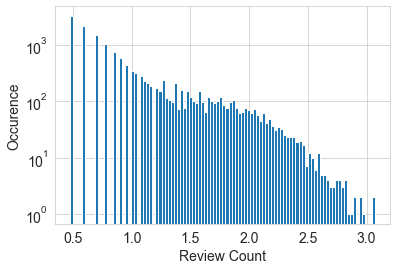

In [38]:
# Составить гистограмму счетчиков отзывов
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['log_review_count'].hist(ax=ax, bins=100)
ax.set_yscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurence', fontsize=14)